<a href="https://colab.research.google.com/github/pnvijay/walk_with_fastai/blob/main/1_PETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the fastai library

*   We will also use the light the torch library to manage dependencies of PyTorch versions with Cuda Versions
*   fastai 2.1.2 uses pytorch 1.7 which in turn needs cuda 11
*   Colab NVidia GPU has CUDA 10.1 currently which works with pytorch 1.6








In [1]:
!pip install light-the-torch -qqq
!ltt install torch torchvision -- -qqq
!pip install fastai --upgrade -qqq
import fastai

     |████████████████████████████████| 1.5MB 10.2MB/s 
     |████████████████████████████████| 735.3 MB 21 kB/s 
     |████████████████████████████████| 12.8 MB 49 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 188 kB 9.0 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 


Find the Nvidia GPU that you have got via Colab


In [2]:
!nvidia-smi

Tue Nov  3 12:32:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Let's find the fastai version as of now

In [3]:
fastai.__version__

'2.1.3'

Now let's import all the internal libraries from fastai

In [4]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

untar_data helps to import datasets from fastai and store in a folder called .fastai/data in our environment.

*   There are various ways in fastai to find details of such functions like untar_data. One method is to use help(function_name)
*   Another way is to use function_name??



In [5]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function file_extract at 0x7f77f7a66d90>, timeout=4)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`.



In [6]:
untar_data??

Let's download the PETS datset containing various labelled images of dog breeds from fastai. It will be stored in /root/.fastai/data/oxford-iiit-pets/ in Colab.

In [7]:
path = untar_data(URLs.PETS)
np.random.seed(2)

Let's find the version of pytorch we are using.

In [8]:
torch.__version__

'1.7.0+cu101'

Let's find out the details of the path, its type, its subdfolders etc. It has two subfolders - images (containing photos of labelled dog breeds) and annotations.

In [9]:
type(path)

pathlib.PosixPath

In [10]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [11]:
fnames = get_image_files(path/'images')
fnames[:1]

(#1) [Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_71.jpg')]

In [12]:
pat = r'(.+)_\d+.jpg$'

In [13]:
batch_tfms = [*aug_transforms(size=224,max_warp=0),Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(size=460,min_scale=0.75,ratio=(1.,1.))
bs = 32

In [14]:
dls = ImageDataLoaders.from_name_re(path=path,fnames=fnames,pat=pat,bs=bs,batch_tfms=batch_tfms,item_tfms=item_tfms)

In [15]:
pets = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items= get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat=r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [16]:
path_im = path/'images'

In [17]:
dls_1 = pets.dataloaders(path_im,bs=32)

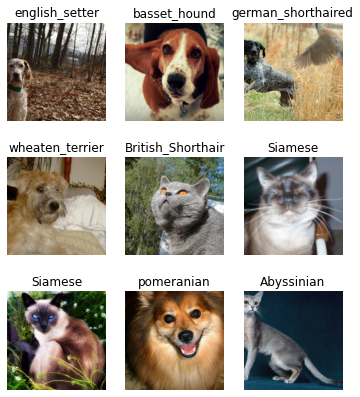

In [18]:
dls_1.show_batch(max_n=9,figsize=(6,7))

In [19]:
dls_1.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [20]:
dls_1.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [21]:
learn = cnn_learner(dls_1,resnet34,metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.194717,0.388402,0.119080,01:09
1,0.472988,0.290688,0.092693,01:11
2,0.333865,0.252234,0.076455,01:11
3,0.246732,0.251790,0.081191,01:09


In [23]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls_1.valid_ds)==len(losses)==len(idxs)

True

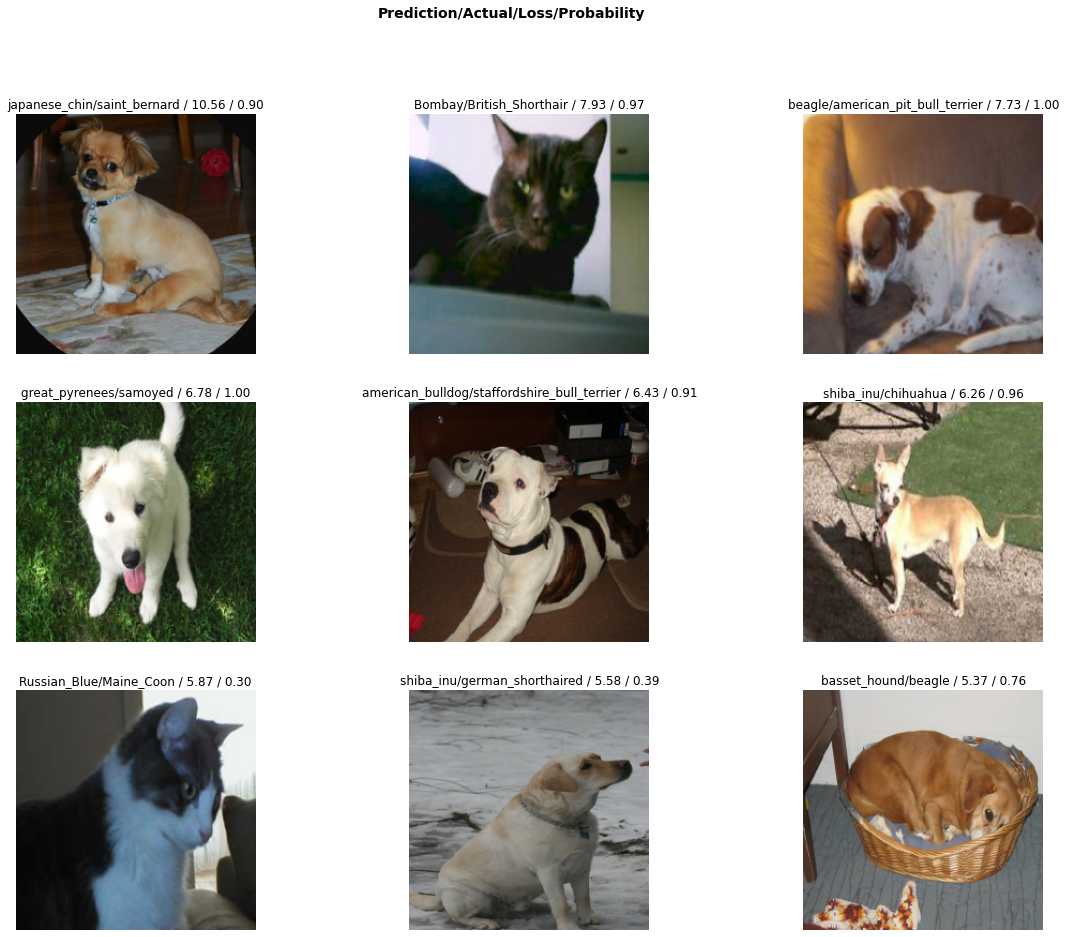

In [25]:
interp.plot_top_losses(9,figsize=(20,15))

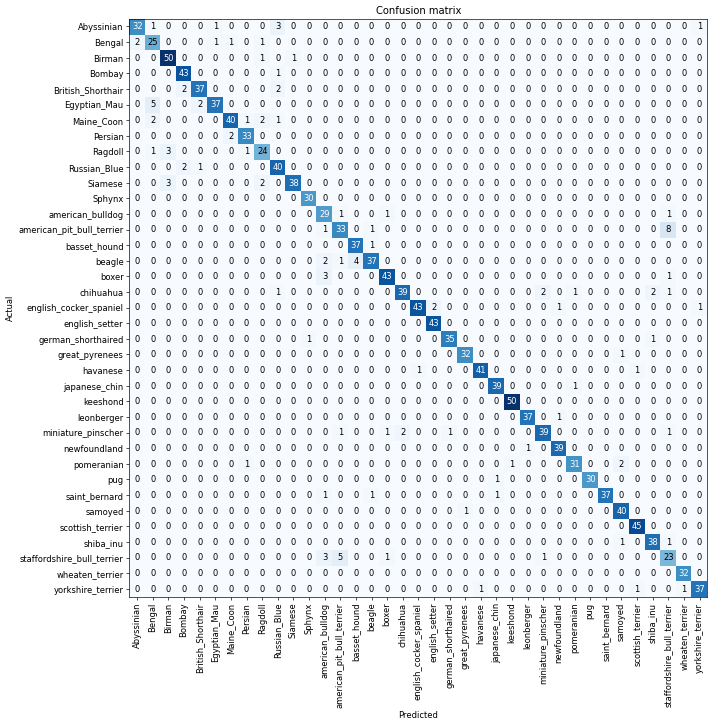

In [26]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [27]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('beagle', 'basset_hound', 4),
 ('Abyssinian', 'Russian_Blue', 3),
 ('Ragdoll', 'Birman', 3),
 ('Siamese', 'Birman', 3),
 ('boxer', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3)]

In [28]:
learn.load('stage-1')

In [29]:
learn.unfreeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.877012,3.702137,0.694181,01:10
1,1.318568,1.312941,0.381597,01:10
2,0.734730,0.597942,0.179296,01:10
3,0.386165,0.452102,0.133965,01:09


In [30]:
learn.load('stage-1')
# learn.lr_find()

SuggestedLRs(lr_min=6.918309736647643e-07, lr_steep=6.309573450380412e-07)

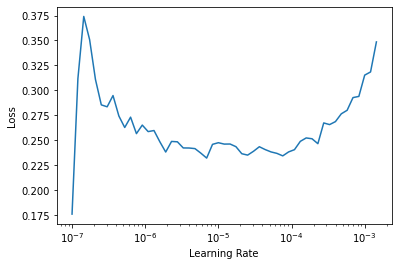

In [31]:
learn.lr_find()

In [32]:
learn.unfreeze()
learn.fit_one_cycle(4,lr_max=slice(5e-6,8e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.249104,0.240549,0.077131,01:10
1,0.210850,0.238155,0.080514,01:09
2,0.156843,0.232254,0.073072,01:09
3,0.137761,0.230112,0.073072,01:09


SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=3.311311274956097e-06)

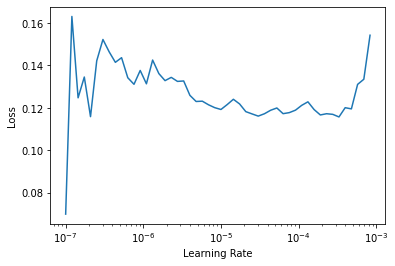

In [33]:
learn.lr_find()

In [34]:
learn.fit_one_cycle(4,lr_max=1e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.139665,0.227930,0.069012,01:09
1,0.136390,0.228721,0.070365,01:09
2,0.133702,0.221965,0.069689,01:09
3,0.128977,0.222383,0.073072,01:09


In [35]:
learn.save('stage-2')

Path('models/stage-2.pth')

In [36]:
learn2 = cnn_learner(dls_1,resnet50,metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0030199517495930195)

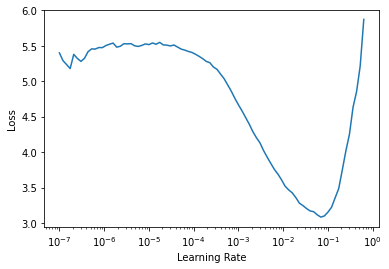

In [37]:
learn2.lr_find()

In [38]:
learn2.fit_one_cycle(4,lr_max=slice(6e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.916158,0.619404,0.147497,01:11
1,0.746819,0.542445,0.114344,01:11
2,0.428134,0.354050,0.087957,01:11
3,0.241332,0.292294,0.077131,01:11


In [39]:
learn2.save('resnet50-1')

Path('models/resnet50-1.pth')

In [40]:
learn2.unfreeze()

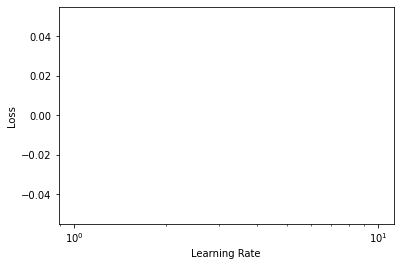

In [41]:
learn2.lr_find()

In [42]:
learn2.fit_one_cycle(5,lr_max=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.182502,0.300899,0.078484,01:17
1,0.191187,0.276082,0.069689,01:16
2,0.164112,0.276293,0.073748,01:16
3,0.184091,0.268998,0.070365,01:16
4,0.152965,0.275570,0.069012,01:17


In [43]:
learn2.save('resnet50-2')

Path('models/resnet50-2.pth')

In [44]:
learn.fit_one_cycle(4,lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.144572,0.229679,0.073748,01:09
1,0.140575,0.226620,0.073072,01:08
2,0.111353,0.228045,0.076455,01:08
3,0.083155,0.228152,0.074425,01:09
